*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[ 0.28085796 -0.67204882]
 [ 1.35876151  0.40496103]
 [-0.81313372  0.20914106]
 [-0.43506306 -0.86786879]
 [-0.99010296 -0.47622884]
 [-0.57181202  0.40496103]
 [ 0.07171249  1.77570083]
 [-0.3546225  -0.57413883]
 [-0.99010296 -0.67204882]
 [-0.3546225  -0.28040887]]
Confusion Matrix : 
 [[62  3]
 [18 15]]
Accuracy :  0.7857142857142857


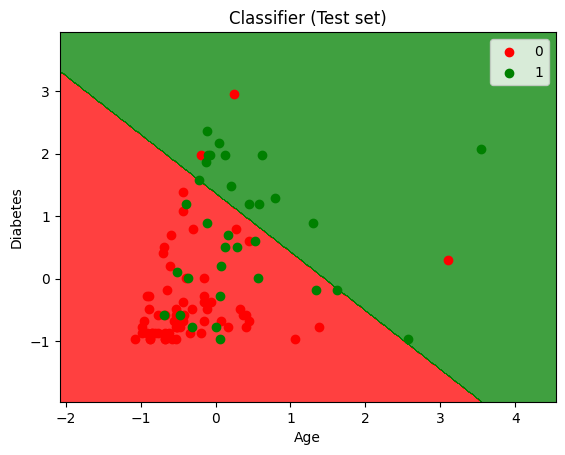

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

dataset = pd.read_csv("./Dataset/diabetes.csv")

x = dataset.iloc[:, [4, 7]].values
y = dataset.iloc[:, 8].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

print ("Accuracy : ", accuracy_score(ytest, y_pred))

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1,
stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
np.array([X1.ravel(), X2.ravel()]).T).reshape(
X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.legend()
plt.show()